olayinka Babalola

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [3]:
# Loading data into a DataFrame
df = pd.read_csv("salary.csv")

# Displaying the data.
print(f"Shape of df: {df.shape}\n")

df.head()

Shape of df: (32560, 15)



,Age,Workclass,Final_weight,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Country,Salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


# Exploration of Data

In [9]:
# checking data types
df.dtypes

Age                int64
Workclass         object
Final_weight       int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Country           object
Salary            object
dtype: object

In [10]:
#checking for NaNs values
df.isnull().sum()

Age               0
Workclass         0
Final_weight      0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Country           0
Salary            0
dtype: int64

In [11]:
#check the statistical summary of the dataset
df.describe()

,Age,Final_weight,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [12]:
# Split the data into numeric and continuous data
num_data = df.select_dtypes(include=[int])
cat_data = df.select_dtypes(include=["O"])

num_data.shape, cat_data.shape

((32560, 6), (32560, 9))

In [13]:
cat_data.head()

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Country,Salary
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K


In [15]:
# Select only columns of datatype 'object' (i.e., categorical)
cat_cols = df.select_dtypes(include=['object']).columns

# Loop through all categorical columns in the dataframe
for col in cat_cols:
    # Print column name and its unique values
    print('Unique values of', col, ':', df[col].unique())



Unique values of Workclass : [' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
Unique values of Education : [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
Unique values of Marital_status : [' Married-civ-spouse' ' Divorced' ' Married-spouse-absent'
 ' Never-married' ' Separated' ' Married-AF-spouse' ' Widowed']
Unique values of Occupation : [' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Adm-clerical' ' Sales' ' Craft-repair'
 ' Transport-moving' ' Farming-fishing' ' Machine-op-inspct'
 ' Tech-support' ' ?' ' Protective-serv' ' Armed-Forces'
 ' Priv-house-serv']
Unique values of Relationship : [' Husband' ' Not-in-family' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
Unique values of Race : [' White' ' Black' ' Asian-Pac-Islander' ' A

# oneHot Encoding

In [81]:
# perform one-hot encoding using the pandas function get_dummies()
df_encoded = pd.get_dummies(df, columns=cat_cols)

#printing the encoded results
df_encoded.head()


,Age,Final_weight,Education_num,Capital_gain,Capital_loss,Hours_per_week,Workclass_ ?,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,...,Country_ Scotland,Country_ South,Country_ Taiwan,Country_ Thailand,Country_ Trinadad&Tobago,Country_ United-States,Country_ Vietnam,Country_ Yugoslavia,Salary_ <=50K,Salary_ >50K
0,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,37,284582,14,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [108]:
# After OHE
data_combined = pd.get_dummies(df, drop_first=True)
print(data_combined.shape)

data_combined.head()

(32560, 101)


,Age,Final_weight,Education_num,Capital_gain,Capital_loss,Hours_per_week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,...,Country_ Puerto-Rico,Country_ Scotland,Country_ South,Country_ Taiwan,Country_ Thailand,Country_ Trinadad&Tobago,Country_ United-States,Country_ Vietnam,Country_ Yugoslavia,Salary_ >50K
0,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,38,215646,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,53,234721,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,28,338409,13,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,37,284582,14,0,0,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


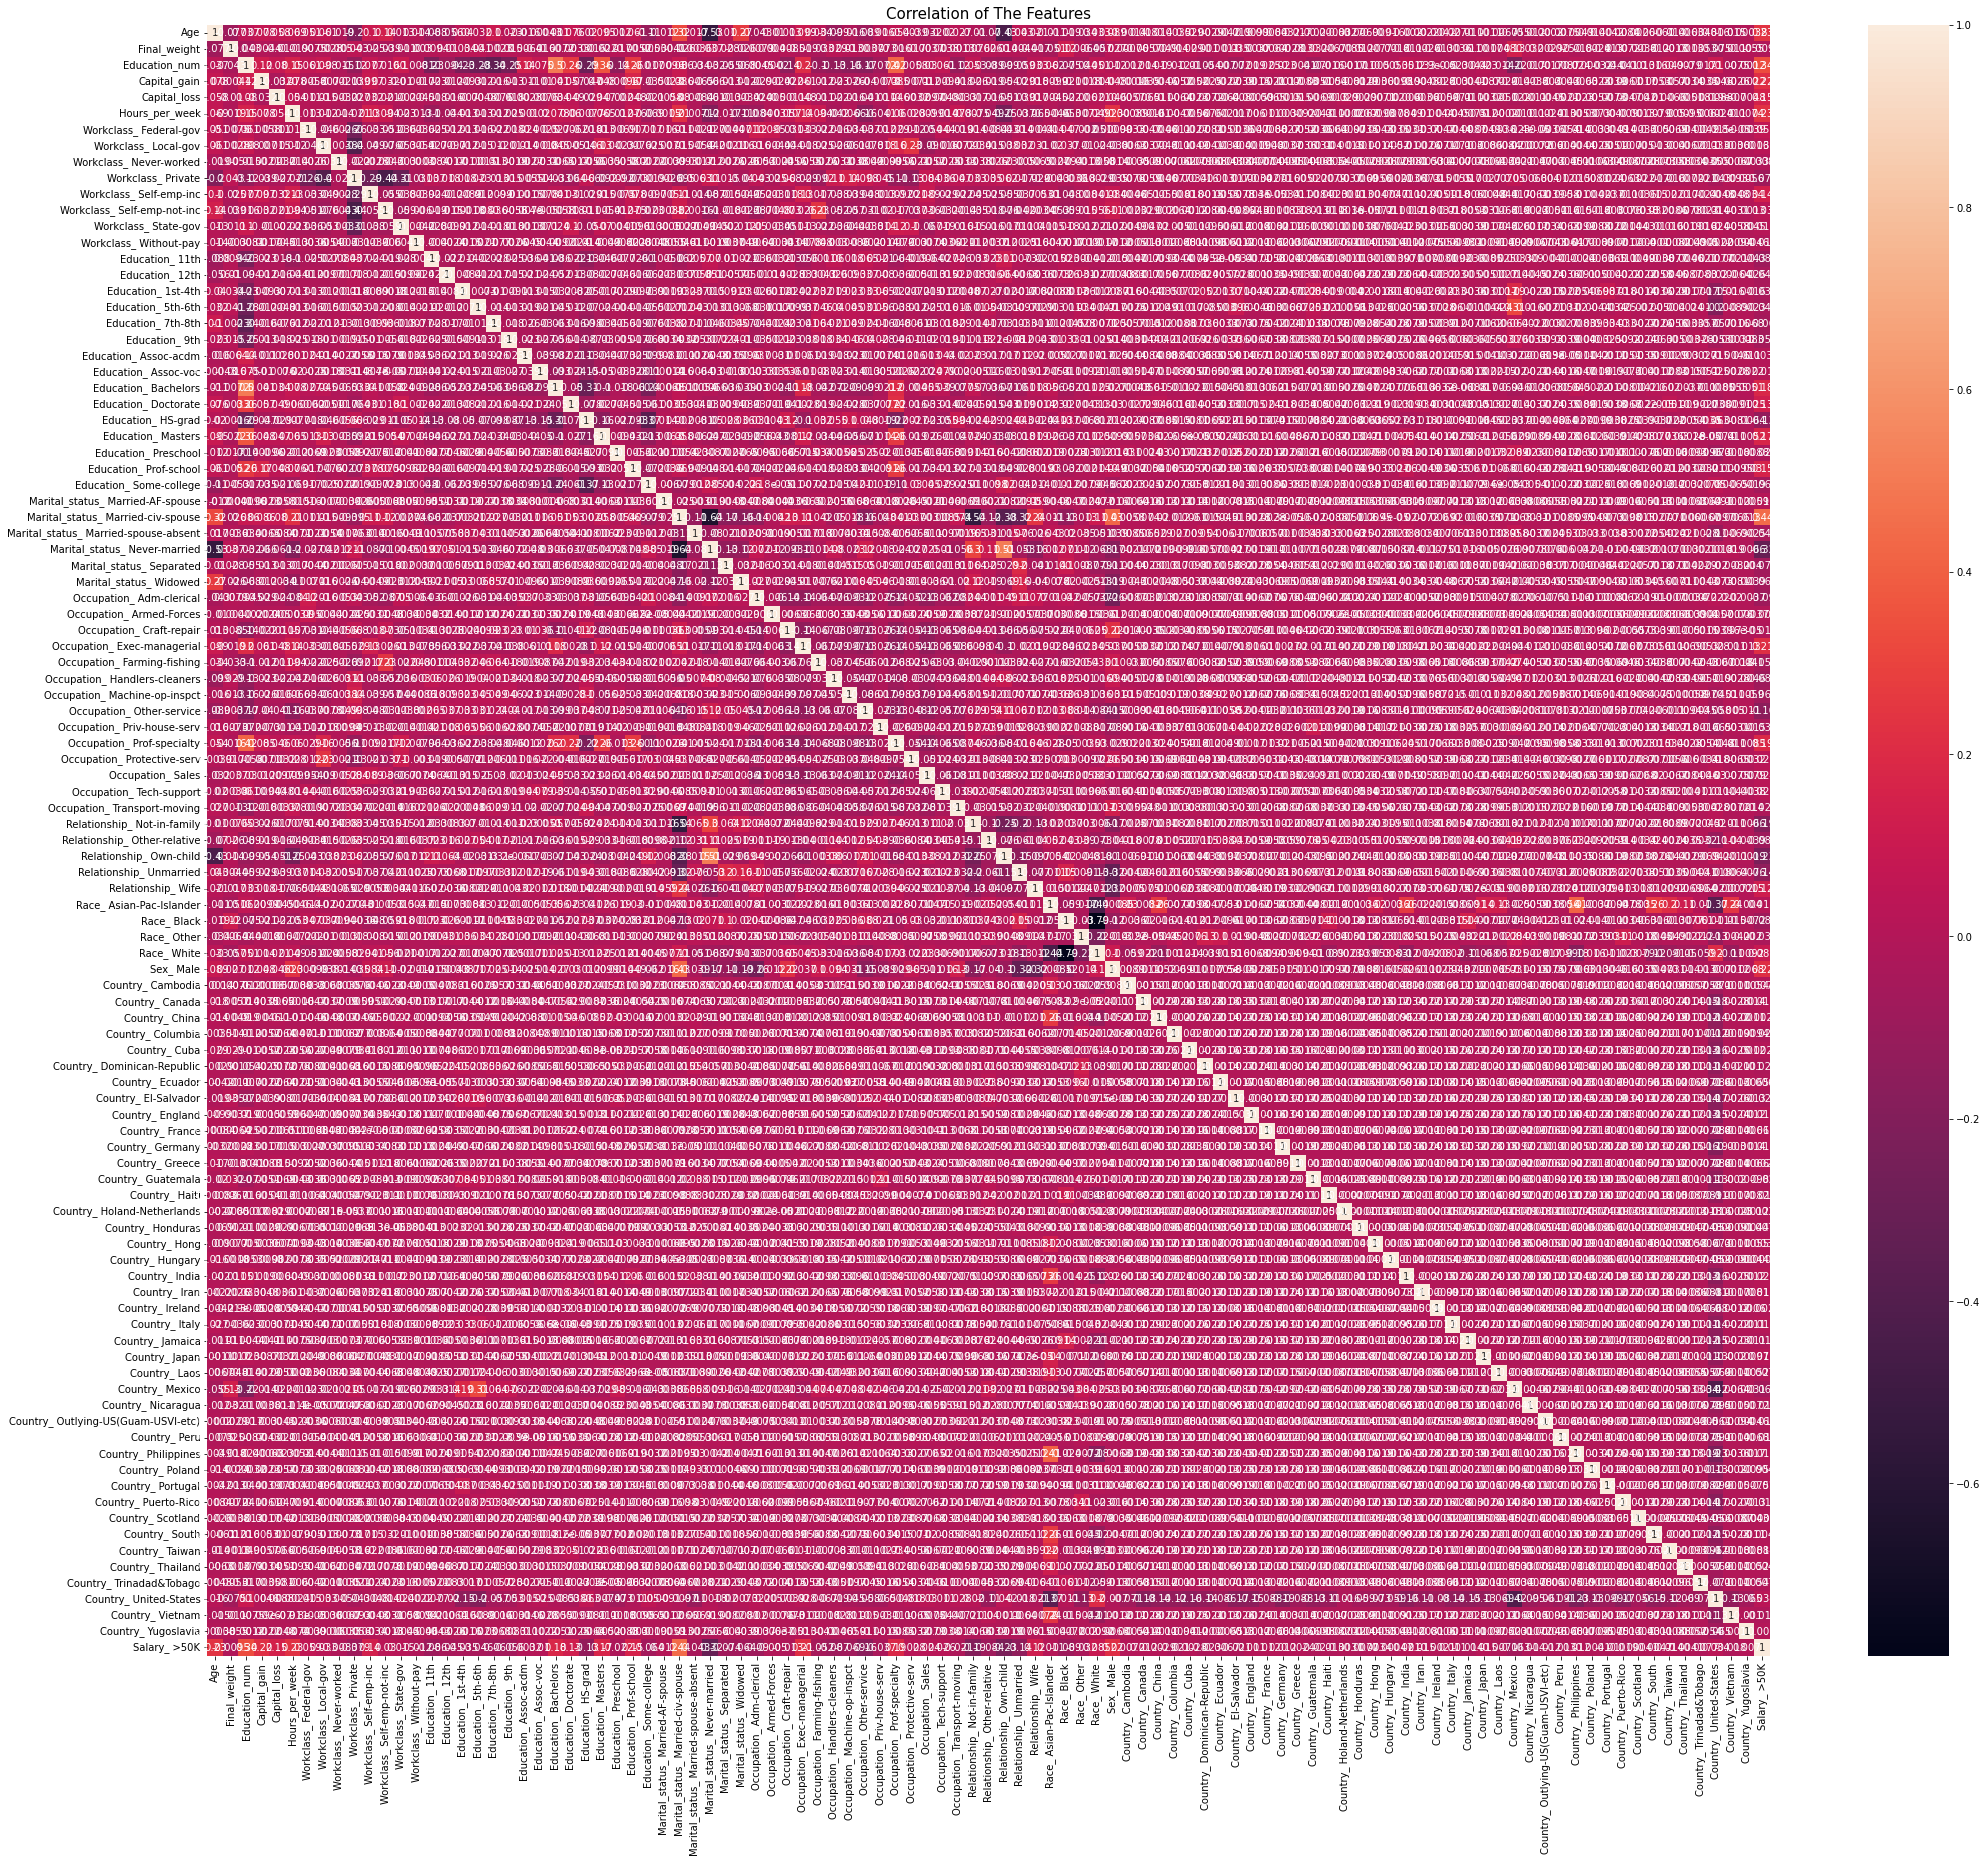

In [119]:
# Check the correlation
corr_matrix = data_combined.corr()
corr_matrix

#  Visualize
plt.figure(figsize=(35, 30))
sns.heatmap(data=corr_matrix, annot=True)
plt.title("Correlation of The Features", size=15)
plt.show()

# Split Data into Training and Validation sets

In [112]:
print(X.shape)
print(y.shape)

(32560, 100)
(32560,)


In [113]:
from sklearn.model_selection import train_test_split

# Define X (features) and y (target)
X = data_combined.drop(['Salary_ >50K'], axis=1)
y = data_combined['Salary_ >50K']

# Split the data into training and testing sets
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=5)
# printing result
X_train.shape, X_validation.shape


((26048, 100), (6512, 100))

In [114]:
X_train.head(2)

,Age,Final_weight,Education_num,Capital_gain,Capital_loss,Hours_per_week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,...,Country_ Portugal,Country_ Puerto-Rico,Country_ Scotland,Country_ South,Country_ Taiwan,Country_ Thailand,Country_ Trinadad&Tobago,Country_ United-States,Country_ Vietnam,Country_ Yugoslavia
8192,34,353881,11,3103,0,60,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
21425,36,323726,10,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# Build Regression Model

In [115]:
from sklearn.linear_model import LinearRegression

# Instantiate
linear_model = LinearRegression()

# Fit the model on the training data
linear_model.fit(X_train, y_train)

# Make predictions
y_pred = linear_model.predict(X_validation)

In [104]:
y_pred

array([0.44419263, 0.28452491, 0.80003652, ..., 0.46958936, 0.20784676,
       0.40292574])

In [121]:
# Create a DataFrame with true and predicted values
result = pd.DataFrame()
result['Actual_score'] = y_validation
result['Predicted_score'] = y_pred
result['Error_in_predictions'] = result['Actual_score'] - result['Predicted_score']
result.head(10)


,Actual_score,Predicted_score,Error_in_predictions
32263,0,0.444193,-0.444193
28320,0,0.284525,-0.284525
9347,1,0.800037,0.199963
10427,0,0.266876,-0.266876
4810,0,0.175308,-0.175308
11139,0,-0.050756,0.050756
20926,0,0.127956,-0.127956
24150,0,0.024441,-0.024441
15504,0,0.168885,-0.168885
9407,0,0.332628,-0.332628


# evaluating model performance

In [118]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn import metrics


# Mean Squared Error (The lower, the better)
mse = mean_squared_error(y_true=y_validation, y_pred=y_pred, squared=True)

# Root Mean Squared Error (The lower, the better)
# Remember to use squared=False
rmse = mean_squared_error(y_true=y_validation, y_pred=y_pred, squared=False)

# Mean Absolute Error (The lower, the better)
mae = mean_absolute_error(y_true=y_validation, y_pred=y_pred)

result_str = (
    "========= Evaluation Metrics ===================="
    f"\nMean Squared Error: {mse}"
    f"\nRoot Mean Squared Error: {rmse}"
    f"\nMean Absolute Error: {mae}"
    "\n==========================================================="
    f"\nR Squared (The higher the better!): {R2} "
)

print(result_str)


========= Evaluation Metrics ====================
Mean Squared Error: 0.11579797308318107
Root Mean Squared Error: 0.34029101234558207
Mean Absolute Error: 0.2624261080657111
R Squared (The higher the better!): 0.34955586999377575 
